# Demo App

## Objective

*The main objective of this section is of evaluating the performance & efficiency of embeddings algorithms*

The algorithms to be tested will be: **<span style="color:blue">RandomWalk</span>** and **<span style="color:blue">Walklets</span>**  
**<span style="color:blue">RandomWalk</span>** - embeds trained using a corpus made via random-walk(k=scale=1)  
**<span style="color:blue">Walklets</span>** - embeds trained using a corpus made via random-walk, with k-scaled(distanced) pairs==>Multiscale latent representation

*An emmbedding is a form of a cell that stores some relevant information that are of several categories,
and they are used to represent an input in a much simpler way, so after a model could consume this valid data,  
or they are used for preserving different network strcutures(learning the real structure of a network)*

*The embeddings are generated by different algorithms that targets to capture different kinds of information  
(the variance-PCA algorithm, the neighbours-DeepWalk,Walklets)*

The evaluation process will be based on comparing several performance metrics returned by  
different kinds of tests executed on the embeddings obtained via the two algorithms described above

The tests will measure both
- *(1)the quality of the informations stored in the embeddings, from the perspective of capturing the network structure info(e.g communities)*
- *(2)the quality of the informations stored in the embeddings, from the perspective of interpreting them as features and to view their capacity  
to represent the node's label(target)*

## About the test structure

As stated above, we will be using different kinds of tests, that will analyze the information that the  
embeddings layers preserve, embeddings obtained by the two algorithms mentioned

First we need to choose the networks(here represented as graphs) that we will use  
for testing.Beacause we will test algorithms that learns the network  
comunities strcuture, we will then use networks with rich number of comunities, and  
well structured.

- <span style="color:red">As this section is an Demo App, it will evaluate the performance & effiency of both RandomWalk and Walklets algorithms on a single network.The network will be created manually by the `nx.planted_partition_graph()` method provided by networkx module, and the network created will have a clear number and structure of comunities.
The training parameters will be reduced for quick execution of this Demo app.  
**This Demo App its an mini-implementation of the walklets_test file.**</span>

## Implementation code-level

- **Scales will be set to k=4,6**  

- **The walk_length will be set to 10 and walk_number set to 10**
- **Percentages of train nodes used in LogRegr will be set to 0.5,0.9**  
- **Number of iterations for computing the uF1 and avg_loss will be set to 3**  
- **Number of epochs for Word2Vec model used for RWE and WE will be set to 250(std), for LogRegr will be set to 120(20% of the epochs used in walklets_test)**  
- **Number of communities in the network will be set to 3, each contatining 32 nodes, labeled by 4 classes**


**We dont store the results, cause the DemoApp will execute quickly*  
**We plot the graph with nodes colored by their similarities with the root node(opt=1)*


-->Initializing models...

-->Training Walklets model with multiple scales: [4, 6]
Generated a total of 960 random walks of length 10, starting from 96.0 nodes.

Processing scale k=4
Extracted 960 walklets for scale k=4
Word2Vec-->Epoch 1/250, Loss: 0.7067
Word2Vec-->Epoch 2/250, Loss: 0.6221
Word2Vec-->Epoch 3/250, Loss: 0.5012
Word2Vec-->Epoch 4/250, Loss: 0.4667
Word2Vec-->Epoch 5/250, Loss: 0.4649
Word2Vec-->Epoch 6/250, Loss: 0.4648
Word2Vec-->Epoch 7/250, Loss: 0.4648
Word2Vec-->Epoch 8/250, Loss: 0.4648
Word2Vec-->Epoch 9/250, Loss: 0.4648
Word2Vec-->Epoch 10/250, Loss: 0.4647
Word2Vec-->Epoch 11/250, Loss: 0.4647
Word2Vec-->Epoch 12/250, Loss: 0.4647
Word2Vec-->Epoch 13/250, Loss: 0.4646
Word2Vec-->Epoch 14/250, Loss: 0.4646
Word2Vec-->Epoch 15/250, Loss: 0.4645
Word2Vec-->Epoch 16/250, Loss: 0.4645
Word2Vec-->Epoch 17/250, Loss: 0.4644
Word2Vec-->Epoch 18/250, Loss: 0.4643
Word2Vec-->Epoch 19/250, Loss: 0.4642
Word2Vec-->Epoch 20/250, Loss: 0.4640
Word2Vec-->Epoch 21/250, Los

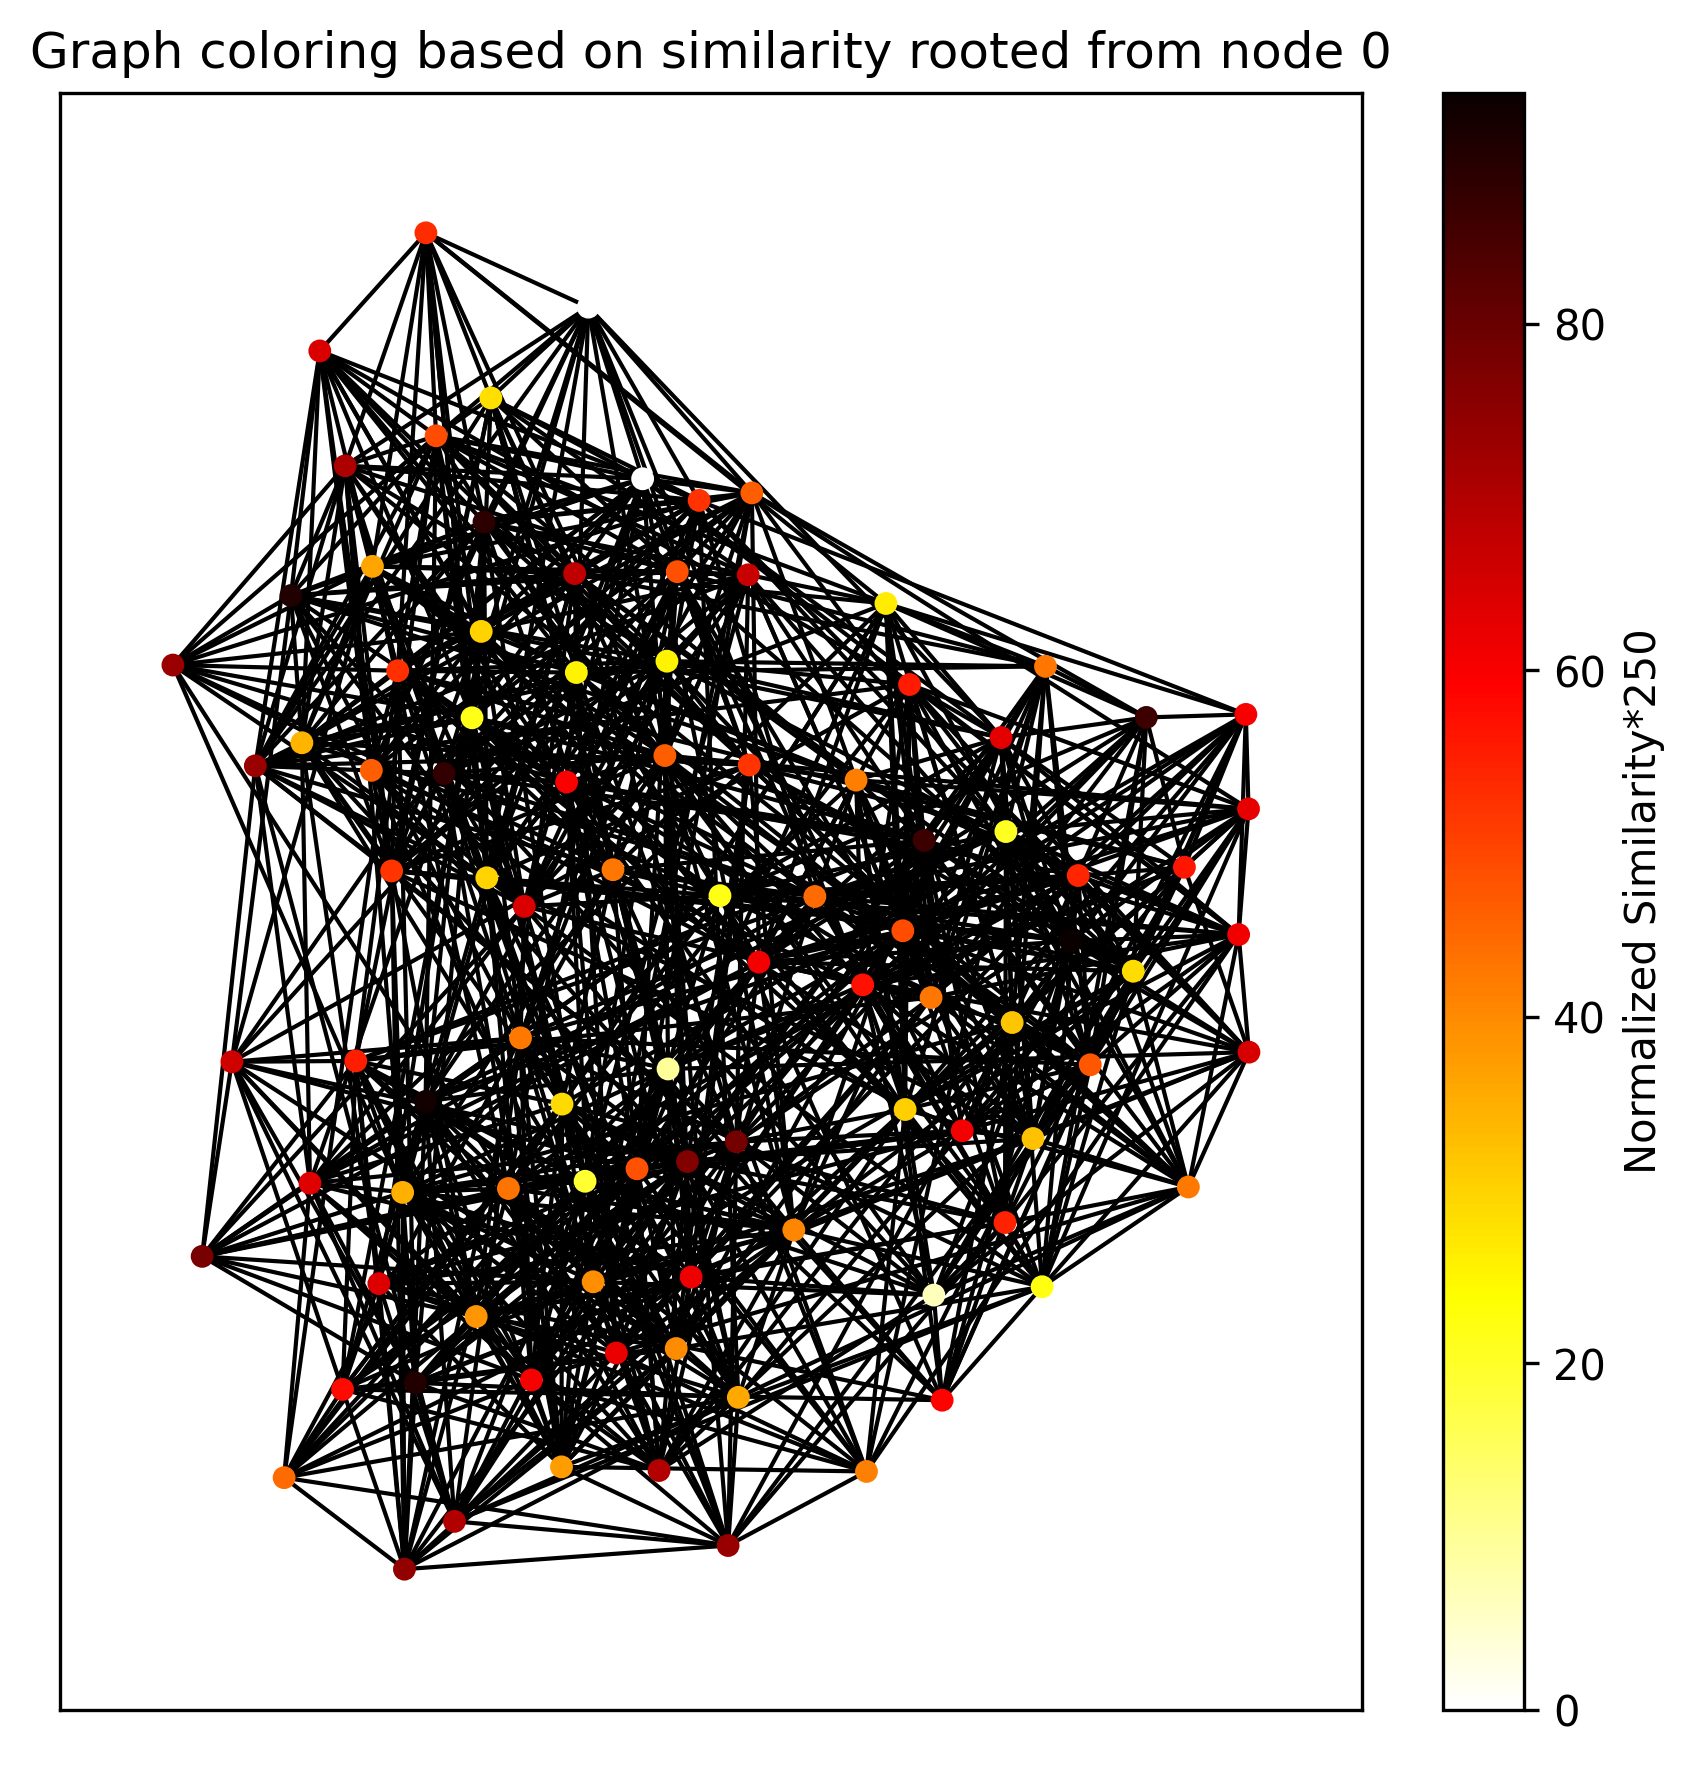

Walklets model heatmap for scale k=6:


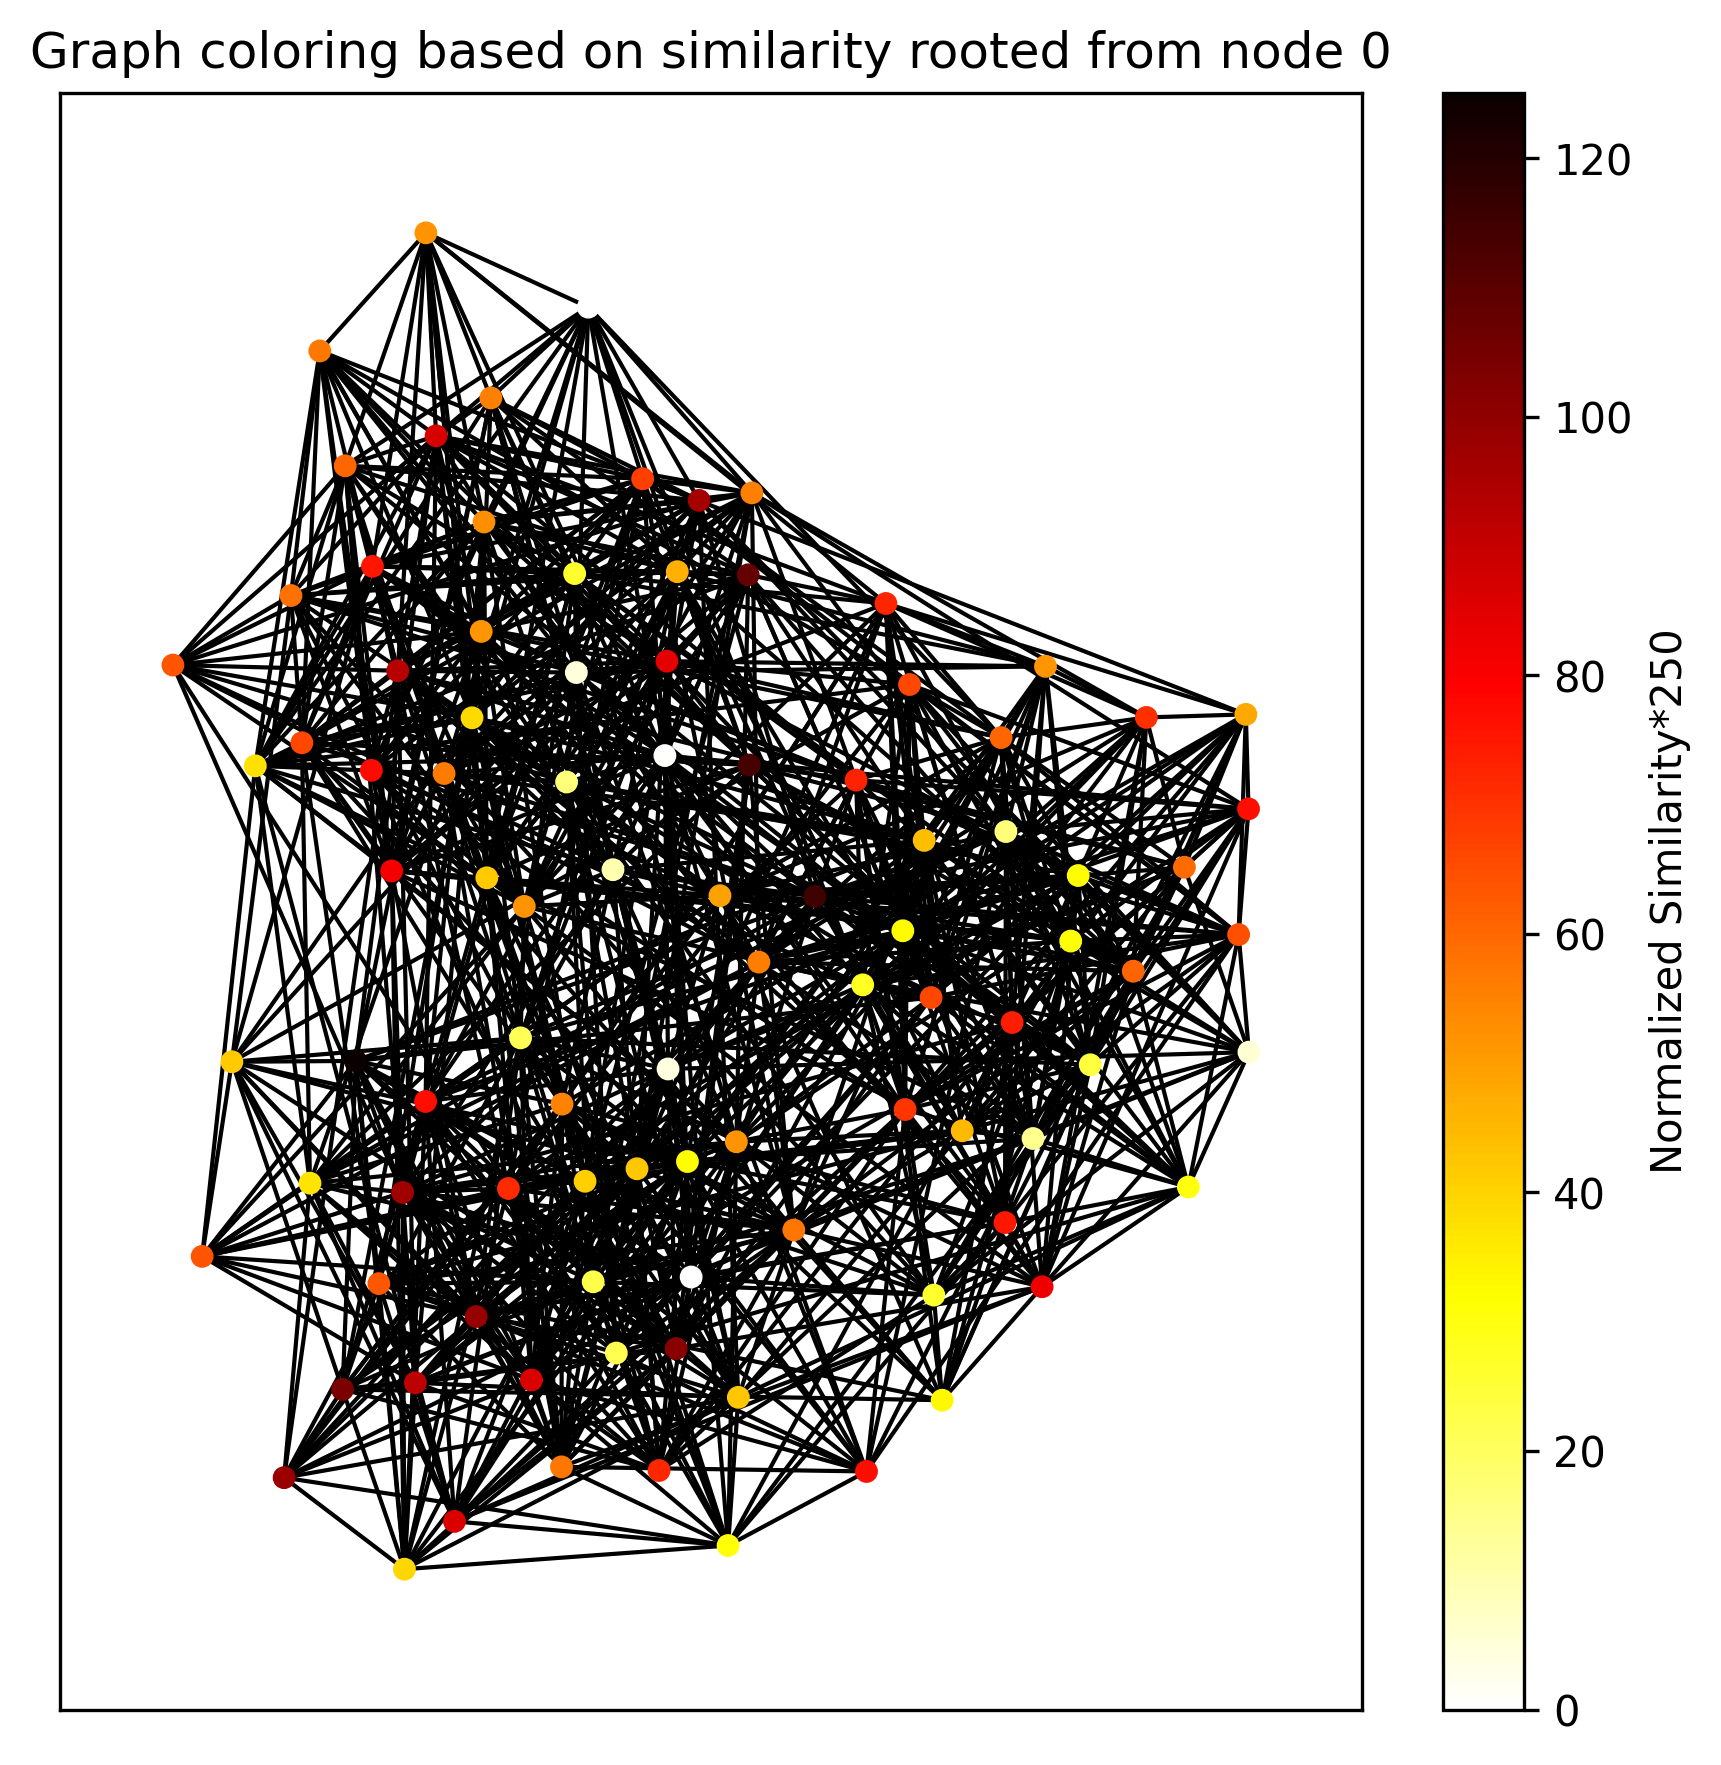

Random Walk model heatmap:


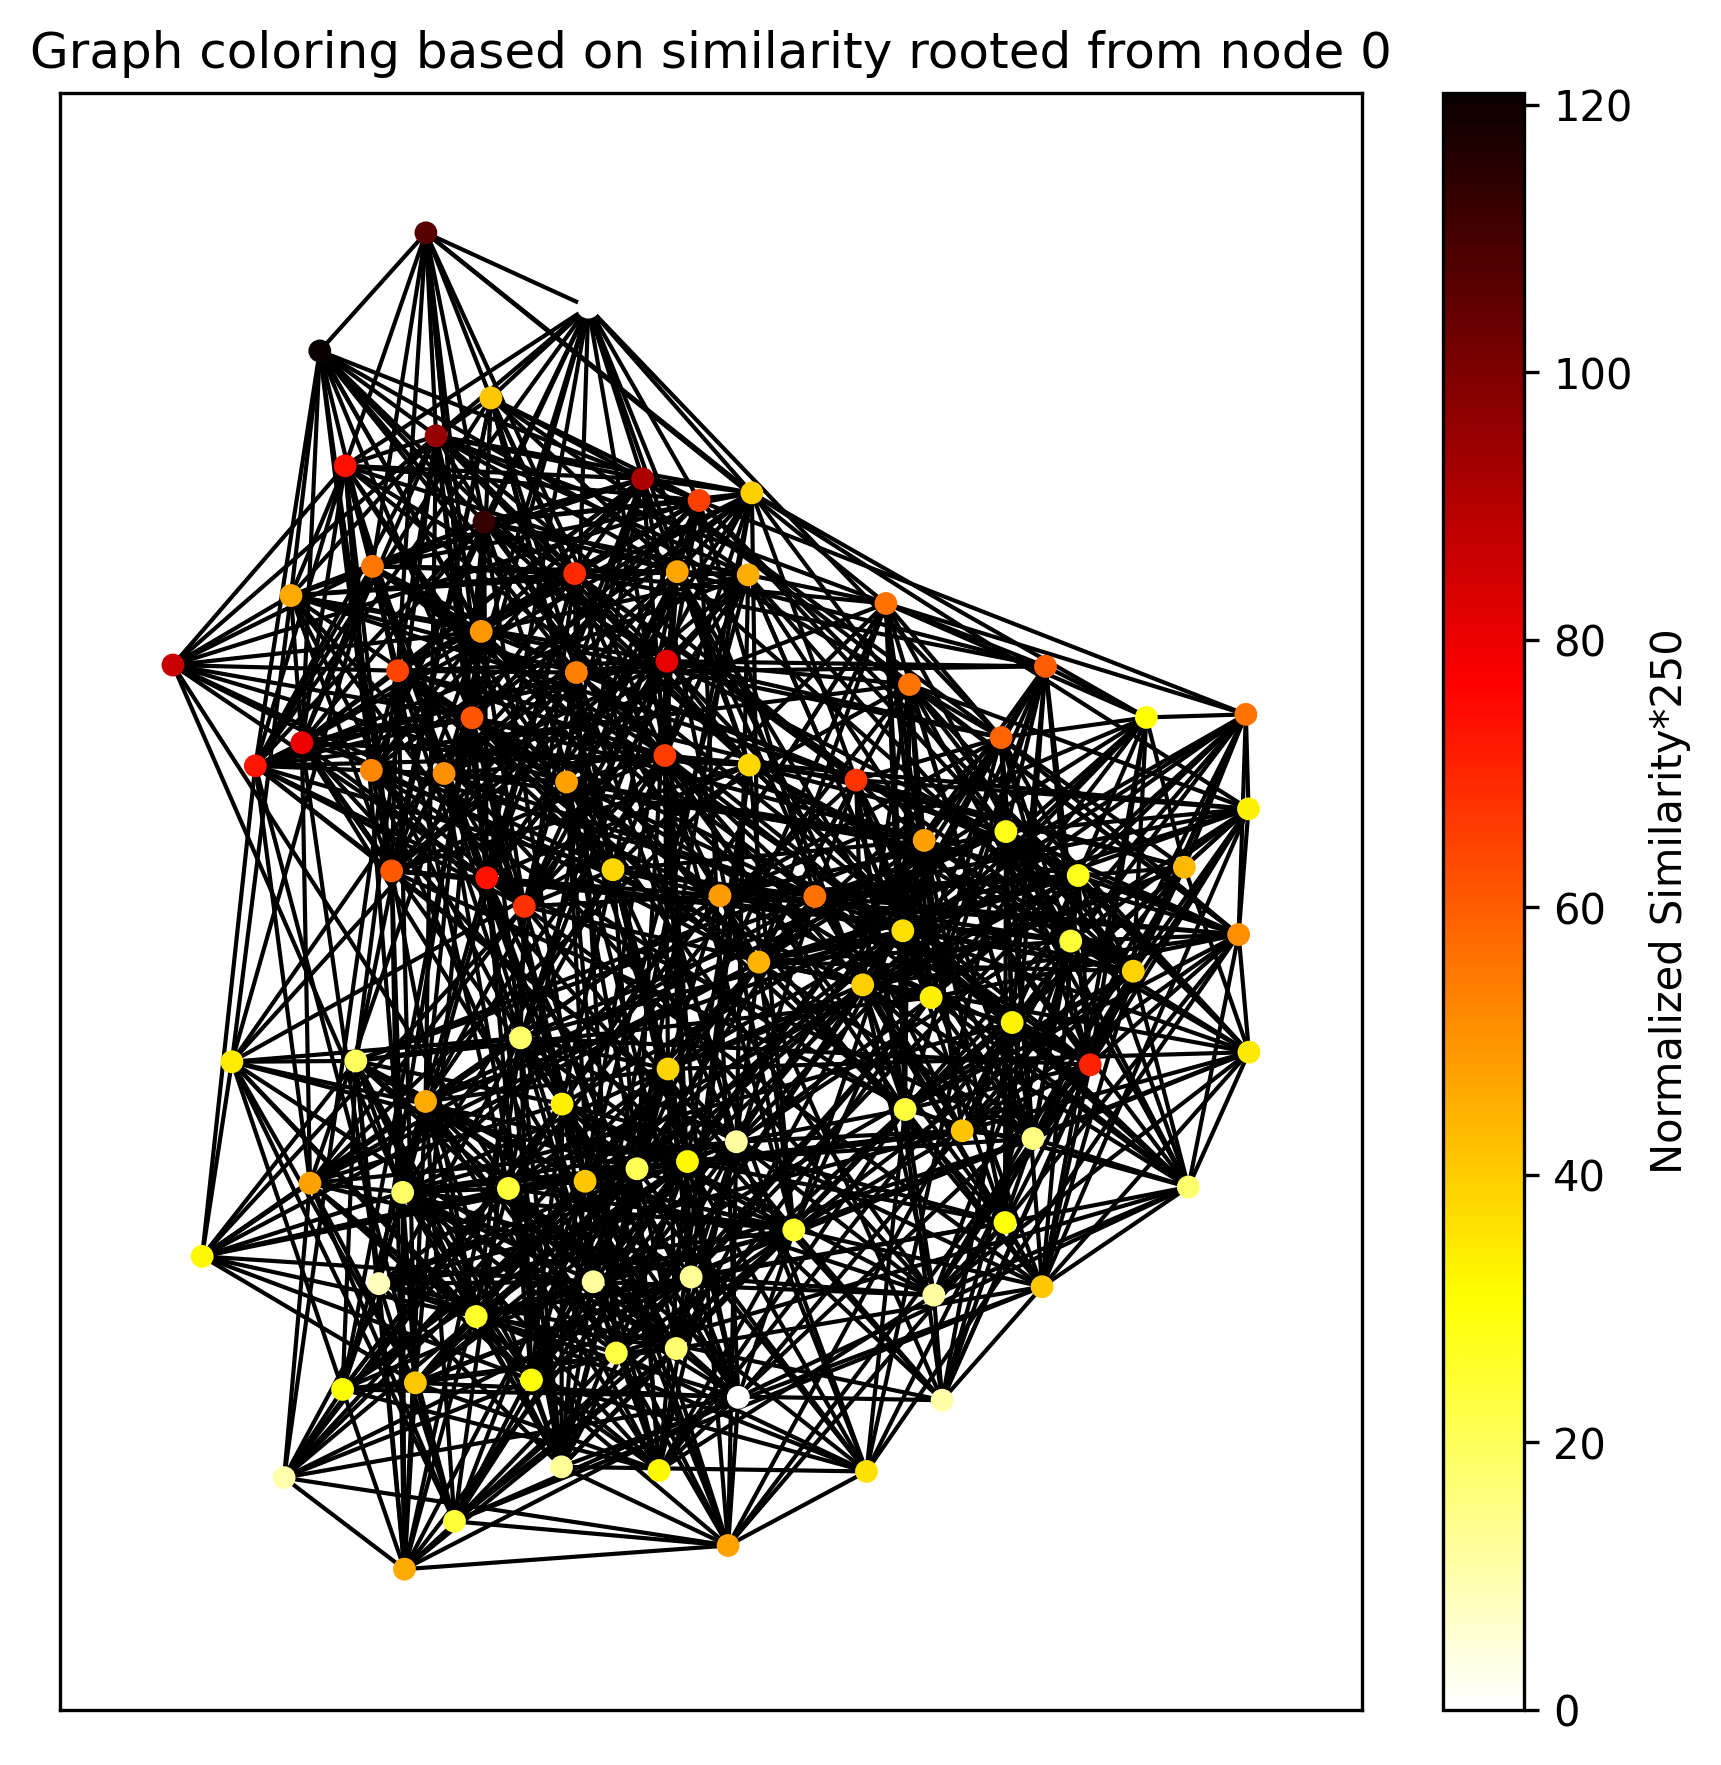


-->Starting evaluation of loss and uF1(Test2)...
Percentage: 50%
	Iteration 1
		RandomWalk → Loss: 0.096914, uF1: 0.979167
		Walklets (k=4) → Loss: 0.181776, uF1: 0.250000
		Walklets (k=6) → Loss: 0.270755, uF1: 0.354167
	Iteration 2
		RandomWalk → Loss: 0.096914, uF1: 0.979167
		Walklets (k=4) → Loss: 0.181776, uF1: 0.250000
		Walklets (k=6) → Loss: 0.270755, uF1: 0.354167
	Iteration 3
		RandomWalk → Loss: 0.096914, uF1: 0.979167
		Walklets (k=4) → Loss: 0.181776, uF1: 0.250000
		Walklets (k=6) → Loss: 0.270755, uF1: 0.354167
Percentage: 90%
	Iteration 1
		RandomWalk → Loss: 0.073077, uF1: 1.000000
		Walklets (k=4) → Loss: 0.297165, uF1: 0.300000
		Walklets (k=6) → Loss: 0.422567, uF1: 0.300000
	Iteration 2
		RandomWalk → Loss: 0.073077, uF1: 1.000000
		Walklets (k=4) → Loss: 0.297165, uF1: 0.300000
		Walklets (k=6) → Loss: 0.422567, uF1: 0.300000
	Iteration 3
		RandomWalk → Loss: 0.073077, uF1: 1.000000
		Walklets (k=4) → Loss: 0.297165, uF1: 0.300000
		Walklets (k=6) → Loss: 0.4225

In [1]:
import os
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score
# Add parent directory for imports
parent_dir = os.path.abspath(os.path.join(".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
# Import your own modules
from alg_base_code.random_walks import RandomWalkEmbedder
from alg_base_code.walklets import WalkletsEmbedder
from utils.utils import plot_similarity_heatmap, split_graph
# Set random seed and parameters
seed = 42
scales = [4,6]  # Multiple scales to test
percentages = [0.5, 0.9]
iterations = 3
root_node = 0
epochLReg = 120

# Create the network by manually planting the communities
num_communities = 3
num_nodes_per_community = 32
G_comm = nx.planted_partition_graph(l=num_communities, k=num_nodes_per_community, p_in=0.5, p_out=0.1, seed=seed)
colors = ["violet", "lightgreen", "lightblue", "yellow"]
comm_color = [colors[v] for v in nx.get_node_attributes(G_comm, "block").values()]
labels=comm_labels = np.array(list(nx.get_node_attributes(G_comm, "block").values()))

# Initialize and train models
print("\n-->Initializing models...")
walklets_model = WalkletsEmbedder(seed=seed,walk_length=10,walk_number=10)
random_walk_model = RandomWalkEmbedder(seed=seed,walk_length=10,walk_number=10)

# Train models
print("\n-->Training Walklets model with multiple scales:", scales)
walklets_model.fit(G_comm, scales=scales)
print("\n-->Training Random Walk model...")
random_walk_model.fit(G_comm)

# Test1
# Generate heatmaps for each individual scale for Walklets and Random Walk(k=1)
print("\n\n-->Generating similarity heatmaps(Test1)...")
print("Generating heatmaps for each scale individually:")
for scale in scales:
    print(f"Walklets model heatmap for scale k={scale}:")
    scale_emb = walklets_model.get_scale_embedding(scale)
    plot_similarity_heatmap(embeddings=scale_emb,
                            node=root_node,
                            graph=G_comm,
                            opt=1,
                            dpi=300,
                            node_size=20)
print("Random Walk model heatmap:")
random_walk_emb = random_walk_model.get_embedding()
plot_similarity_heatmap(embeddings=random_walk_emb,
                        node=root_node,
                        graph=G_comm,
                        opt=1,
                        dpi=300,
                        node_size=20)

# Test2
# Initialize result containers
walklets_results = {k: {"scale": k, "perc_results": {}} for k in scales}
random_walk_results = {perc: {"perc":perc, "uf1": [], "avg_loss": []} for perc in percentages}

print("\n-->Starting evaluation of loss and uF1(Test2)...")
# Main evaluation loop
for perc in percentages:
    print(f"Percentage: {int(perc * 100)}%")
    for it in range(iterations):
        print(f"\tIteration {it + 1}")

        # Split train/test nodes
        graph_train, labels_train, graph_test, labels_test = split_graph(G_comm, labels, perc, seed=seed)

        # Collect training and testing nodes
        train_nodes = list(graph_train.nodes())
        test_nodes = list(graph_test.nodes())
        y_train = np.array([labels[n] for n in train_nodes])
        y_test = np.array([labels[n] for n in test_nodes])

        # === RANDOM WALK Phase ===
        X_train_rw = random_walk_model.get_embedding_specific(train_nodes)
        X_test_rw = random_walk_model.get_embedding_specific(test_nodes)

        clf_rw = LogisticRegression(max_iter=epochLReg)
        # Note: The solver 'lbfgs' is generally more stable for larger datasets
        clf_rw.fit(X_train_rw, y_train)
        preds_rw = clf_rw.predict(X_test_rw)
        probs_rw = clf_rw.predict_proba(X_train_rw)
        loss_rw = log_loss(y_train, probs_rw)
        uf1_rw = f1_score(y_test, preds_rw, average="micro")

        random_walk_results[perc]["uf1"].append(uf1_rw)
        random_walk_results[perc]["avg_loss"].append(loss_rw)

        print(f"\t\tRandomWalk → Loss: {loss_rw:.6f}, uF1: {uf1_rw:.6f}")

        # === WALKLETS Phase (loop over scales) ===
        for k in scales:
            X_train_wk = walklets_model.get_scale_embedding_specific(train_nodes, scale=k)
            X_test_wk = walklets_model.get_scale_embedding_specific(test_nodes, scale=k)

            clf_wk = LogisticRegression(max_iter=epochLReg)
            clf_wk.fit(X_train_wk, y_train)
            preds_wk = clf_wk.predict(X_test_wk)
            probs_wk = clf_wk.predict_proba(X_train_wk)
            loss_wk = log_loss(y_train, probs_wk)
            uf1_wk = f1_score(y_test, preds_wk, average="micro")

            # Store results
            if perc not in walklets_results[k]["perc_results"]:
                walklets_results[k]["perc_results"][perc] = {"perc":perc,"uf1": [], "avg_loss": []}
            walklets_results[k]["perc_results"][perc]["uf1"].append(uf1_wk)
            walklets_results[k]["perc_results"][perc]["avg_loss"].append(loss_wk)

            print(f"\t\tWalklets (k={k}) → Loss: {loss_wk:.6f}, uF1: {uf1_wk:.6f}")

# === Final Summary ===
print("\n===== Final Averaged Results =====")
for perc in percentages:
    p_key = int(perc * 100)
    rw_uF1 = np.mean(random_walk_results[perc]["uf1"])
    rw_loss = np.mean(random_walk_results[perc]["avg_loss"])
    print(f"RandomWalk {p_key}%: Avg uF1 = {rw_uF1:.6f}, Avg Loss = {rw_loss:.6f}")
print("\n")
for k in scales:
    print(f"\nWalklets (scale k={k})")
    for perc in percentages:
        p_key = int(perc * 100)
        if perc in walklets_results[k]["perc_results"]:
            uf1_list = walklets_results[k]["perc_results"][perc]["uf1"]
            loss_list = walklets_results[k]["perc_results"][perc]["avg_loss"]
            avg_uf1 = np.mean(uf1_list)
            avg_loss = np.mean(loss_list)
            print(f"{p_key}%: → Avg uF1 = {avg_uf1:.6f}, Avg Loss = {avg_loss:.6f}")